In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create data frame
df = pd.read_csv ('AirPassengers.csv')

In [3]:
df.head()

,Date,#Passengers
0,12-Jan-1949,112
1,24-Feb-1949,118
2,22-Mar-1949,132
3,5-Apr-1949,129
4,24-May-1949,121


In [4]:
# convert column Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# convert format
df['Date'] = df['Date'].dt.strftime('%Y-%m')
df.head()

,Date,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


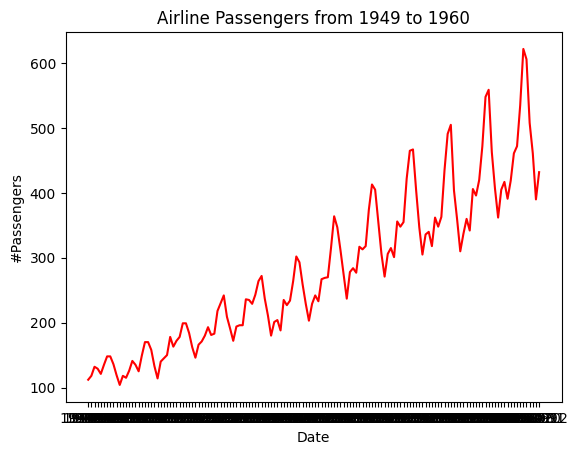

In [6]:
# plot the data
ax = sns.lineplot (x = 'Date', y = '#Passengers', data = df, color = 'r')
ax.set_title ('Airline Passengers from 1949 to 1960')
plt.show()

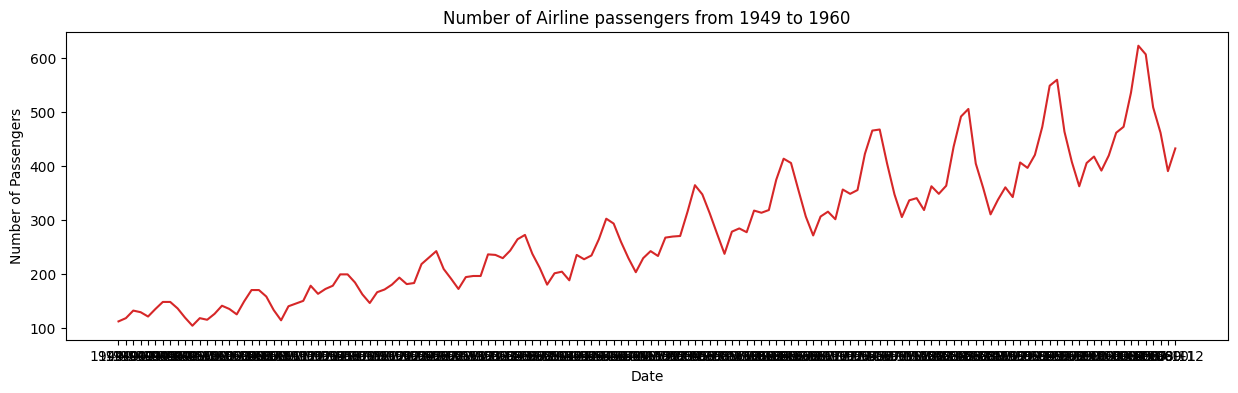

In [7]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['#Passengers'], 
        title='Number of Airline passengers from 1949 to 1960')

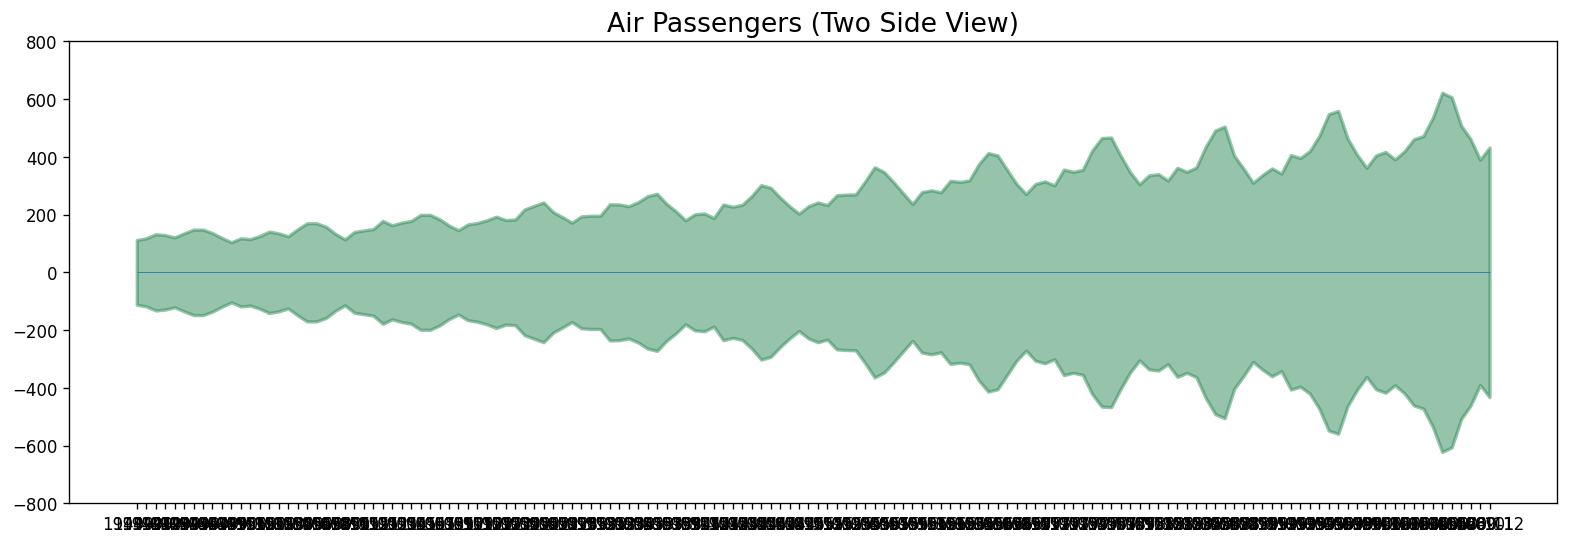

In [8]:
x = df['Date'].values
y1 = df['#Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

##### Patterns in a Time Series
* Time Series = Base Level + Trend + Seasonality + Error  
* Trend = there is an increasing or decreasing slope in the time series   
* Seasonality = there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

###### Additive time series
Value = Base Level + Trend + Seasonality + Error

###### Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

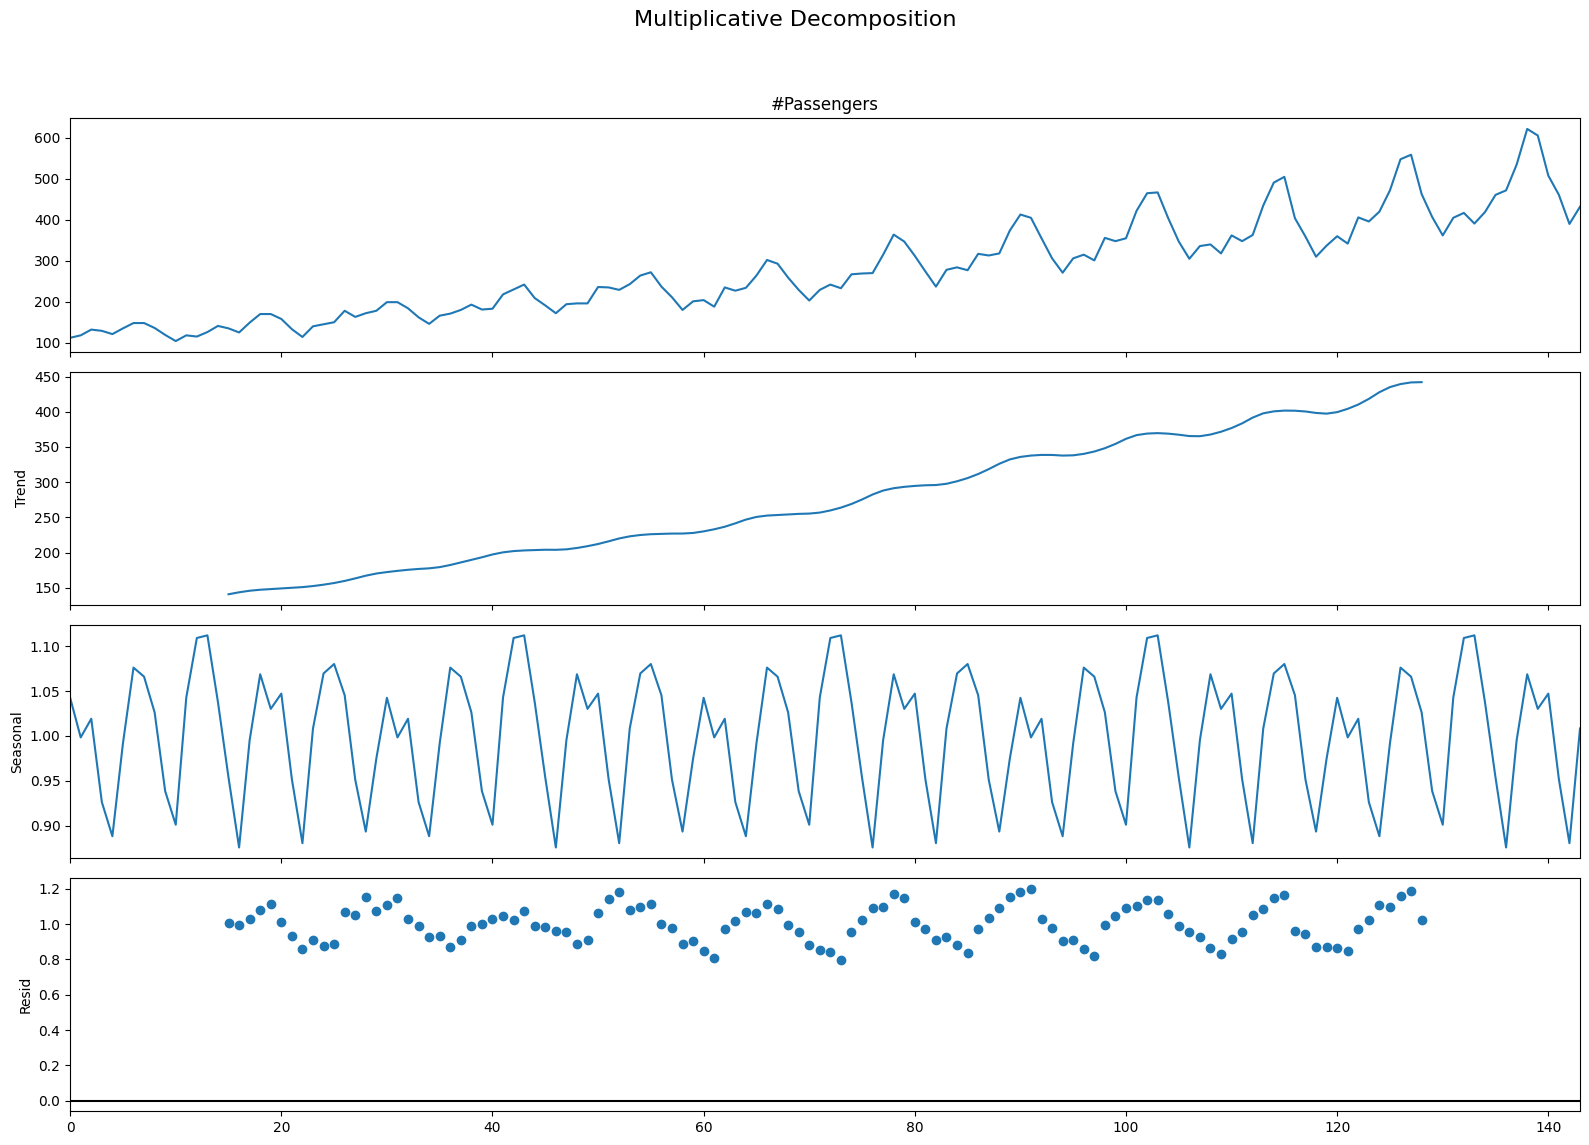

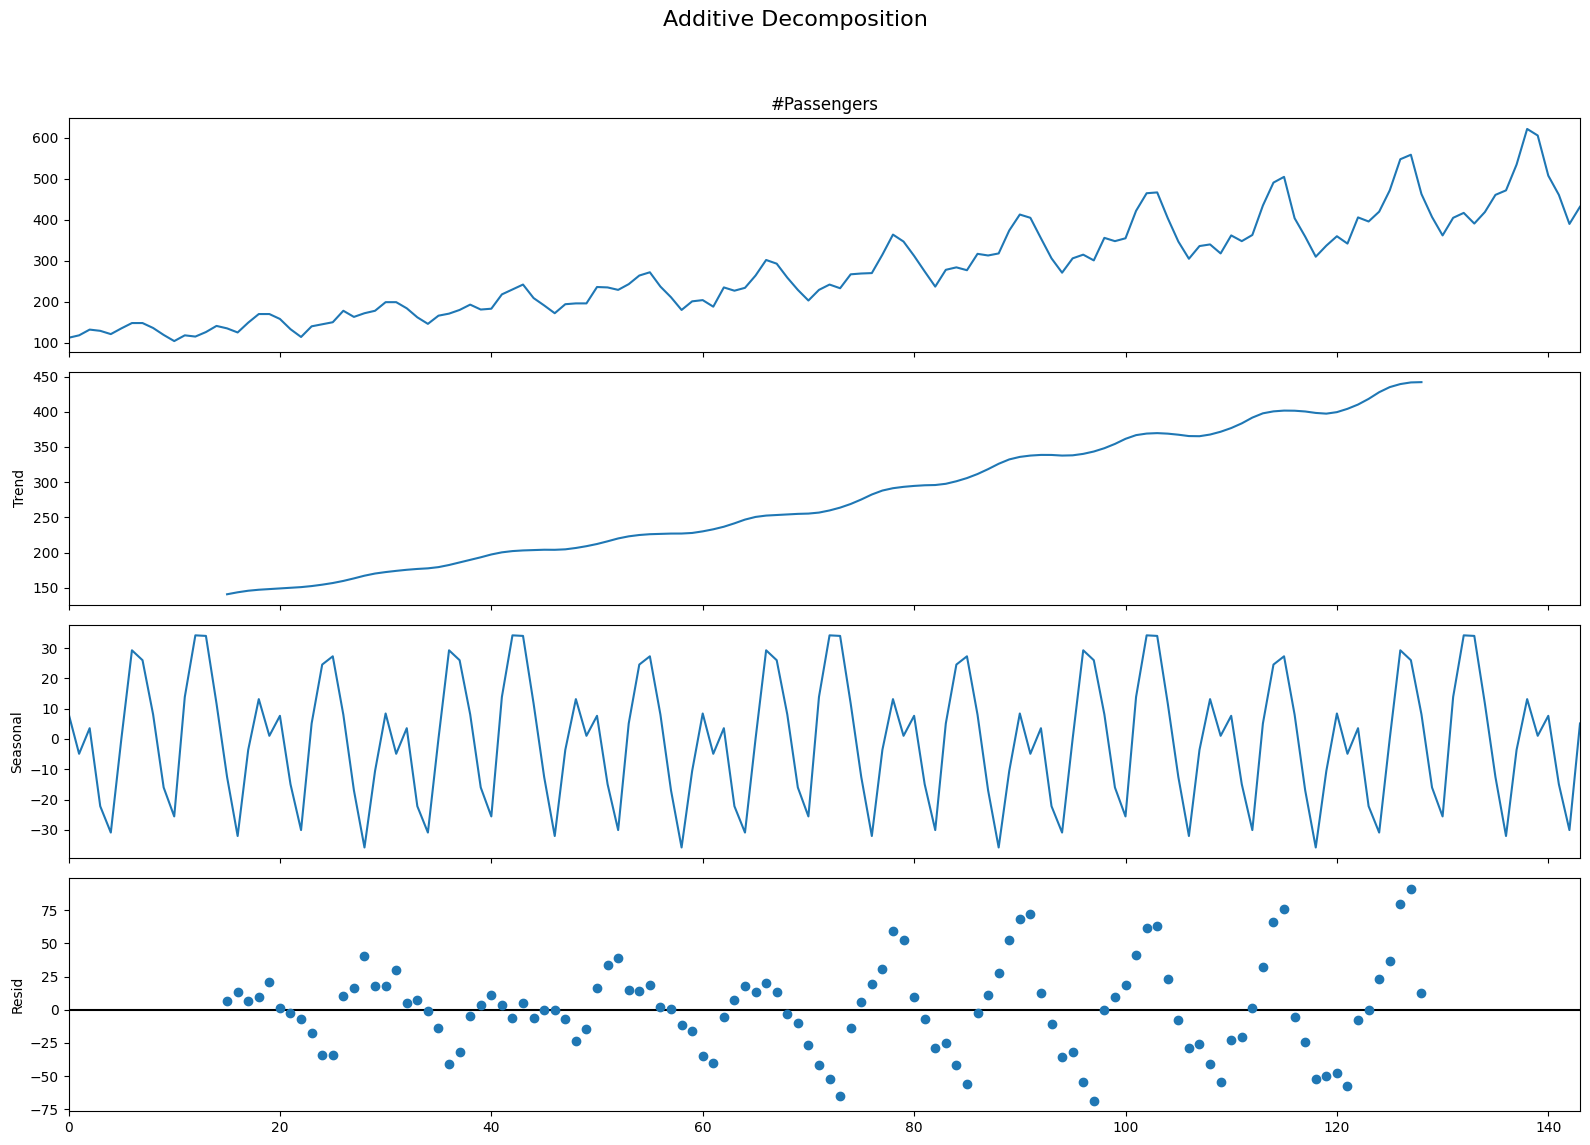

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

##### Stationary and Non-Stationary Time Series
* A stationary series is one where the values of the series is not a function of time.
* In a stationary series like mean, variance and autocorrelation are constant over time. 
* Autocorrelation is the correlation of the series with its previous values.
* A stationary time series is independent of seasonal effects as well.
* We can covert any non-stationary time series into a stationary one by applying a suitable transformation. 
* Most statistical forecasting methods are designed to work on a stationary time.

##### Steps to make the series stationary
* Differencing the Series (once or more)
* Take the log of the series
* Take the nth root of the series
* Combination of the aboveSteps to make a series stationary 

###### Steps in Differencing
* If Y(t) is the value at time t, then the first difference of Y = Y(t) – Y(t-1). 
* Differencing the series is nothing but subtracting the next value by the current value.
* If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.

###### Reasons to convert to stationary
* Forecasting a stationary series is relatively easy and the forecasts are more reliable.
* Autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.
* Linear regression works best if the predictors (X variables) are not correlated against each other. Stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

###### Tests for Stationarity
* The stationarity of a series can be checked by looking at the plot of the series.
* Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.
* Quantitative methods can be used to determine if a given series is stationary or not, like Unit Root Tests. 
* There are multiple implementations of Unit Root tests like:
    * Augmented Dickey Fuller test (ADF Test)
    * Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
    * Philips Perron test (PP Test)

###### Augmented Dickey Fuller test (ADF Test) 
Augmented Dickey Fuller test or (ADF Test) is the most commonly used test to detect stationarity. Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.

###### Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)  
The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test.

###### Philips Perron test (PP Test)  
The Philips Perron or PP test is a unit root test. It is used in the time series analysis to test the null hypothesis that a time series is integrated of order 1. It is built on the ADF test discussed above.

##### Difference between White Noise and Stationary Series
* The white noise is not a function of time. Its mean and variance does not change over time. * Unlike a stationary series, the white noise is completely random with a mean of 0. In white noise there is no pattern.
* A sequence of completely random numbers with a mean of zero is a white noise.

<Axes: title={'center': 'Random White Noise'}>

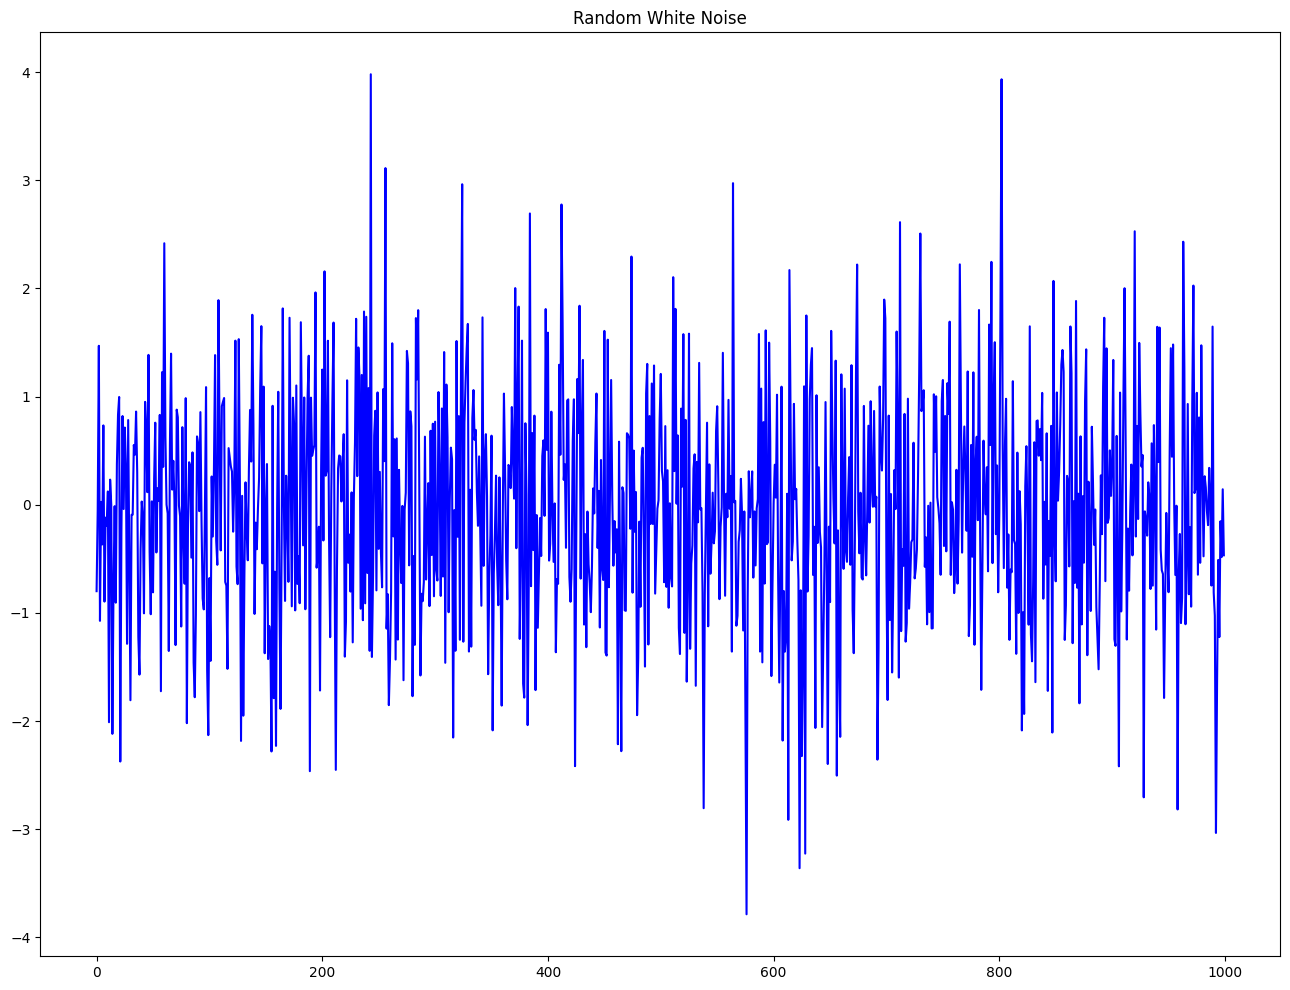

In [10]:
# plot of random numbers
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

##### Detrend a Time Series
Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:
* Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.
* We subtract the trend component obtained from time series decomposition.
* Subtract the mean.
* Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

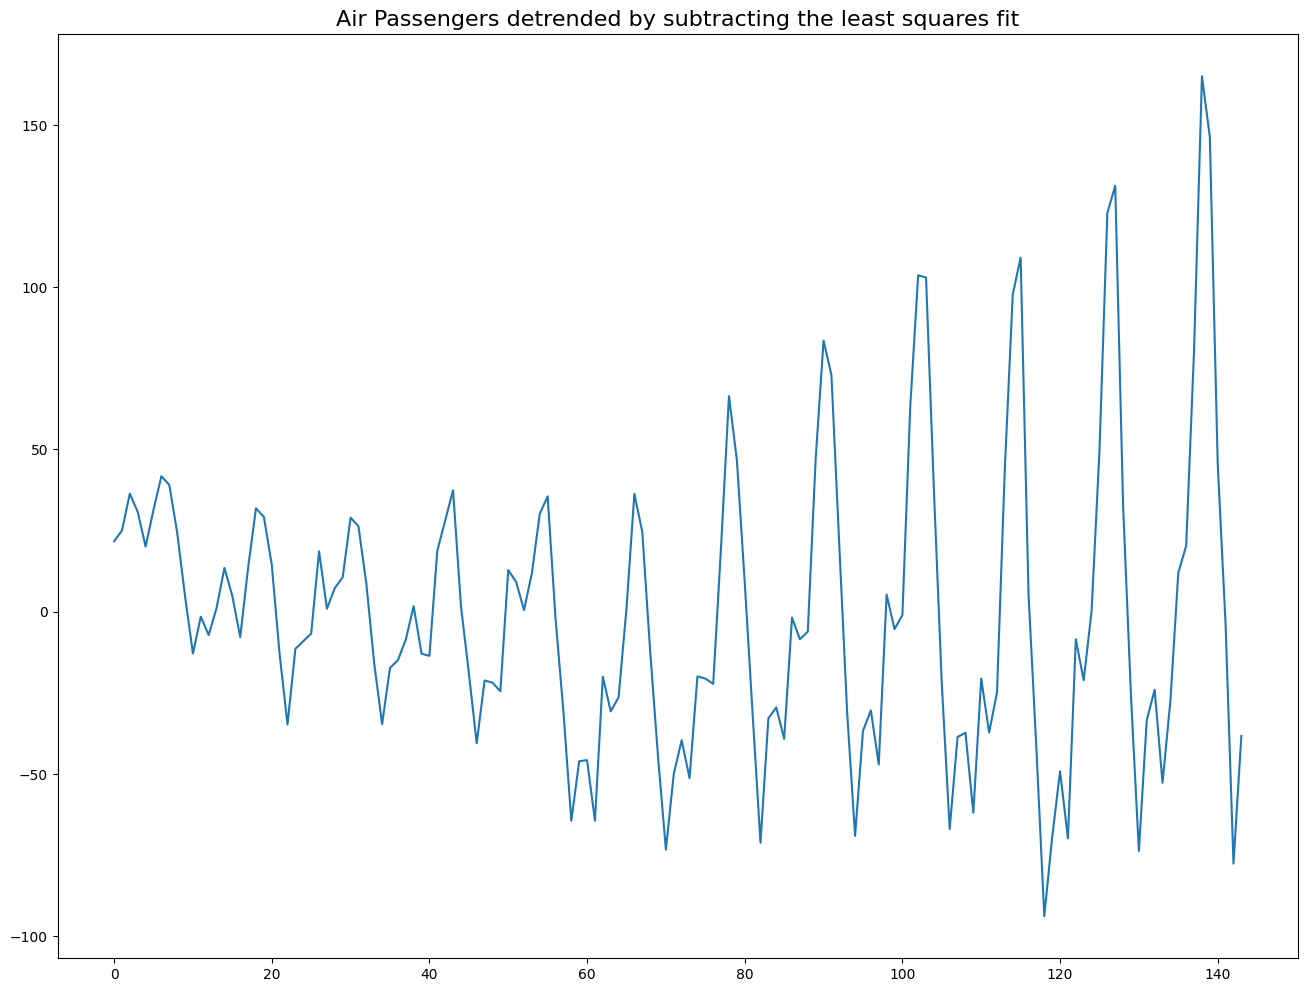

In [11]:
# subtract the line of best fit from the time series
from scipy import signal
detrended = signal.detrend(df['#Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

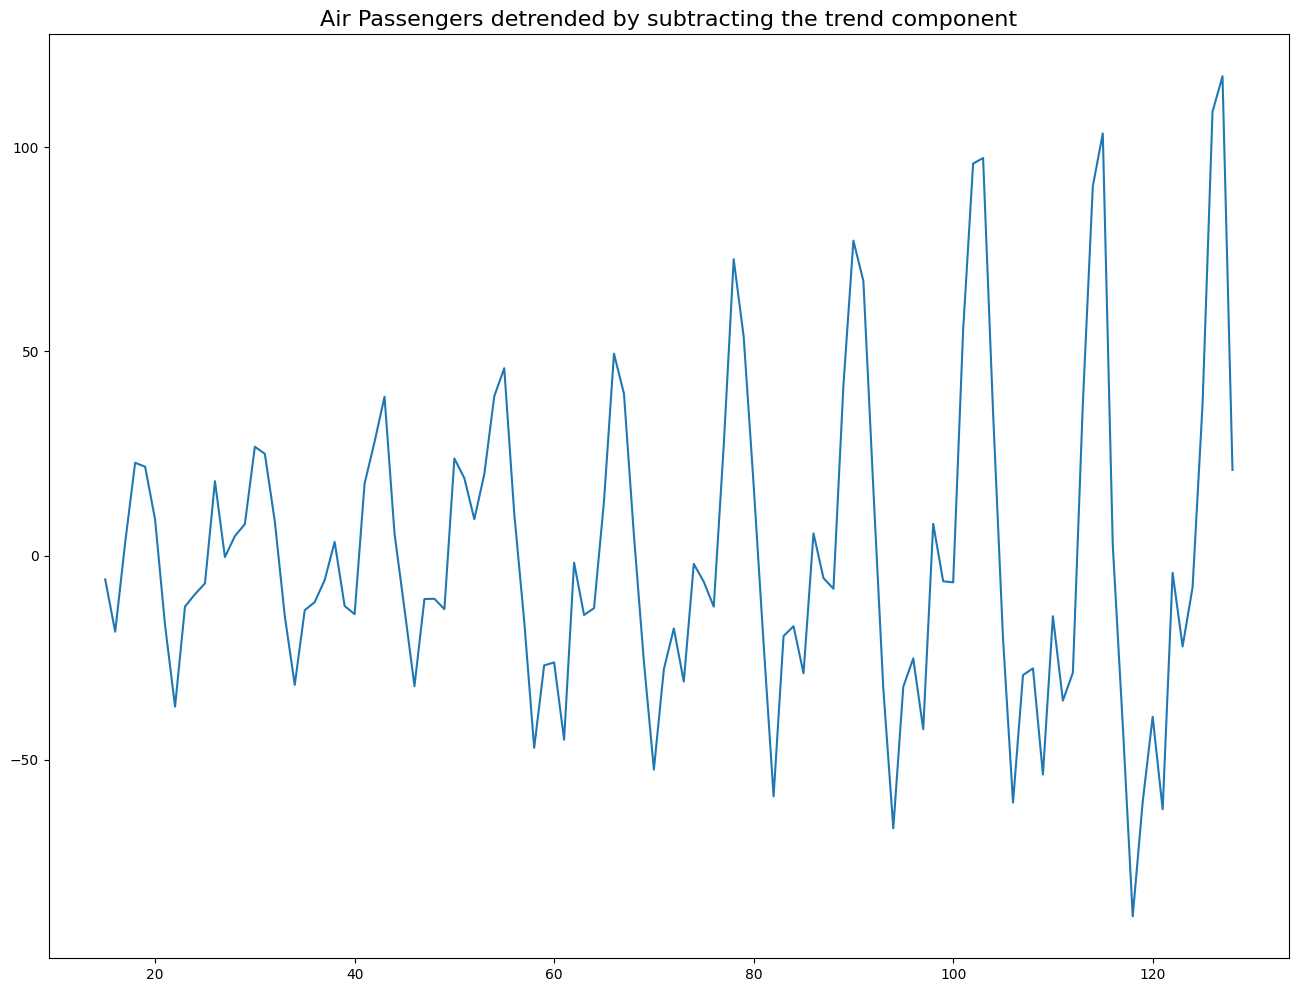

In [12]:
# Use a statsmodel to subtract the trend component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['#Passengers'], model='multiplicative', period=30)
detrended = df['#Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

##### Deseasonalize a Time Series
There are multiple approaches to deseasonalize a time series. These approaches are listed below:
* Take a moving average with length as the seasonal window. This will smoothen in series in the process.
* Seasonal difference the series (subtract the value of previous season from the current value).
* Divide the series by the seasonal index obtained from STL decomposition. If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

[]

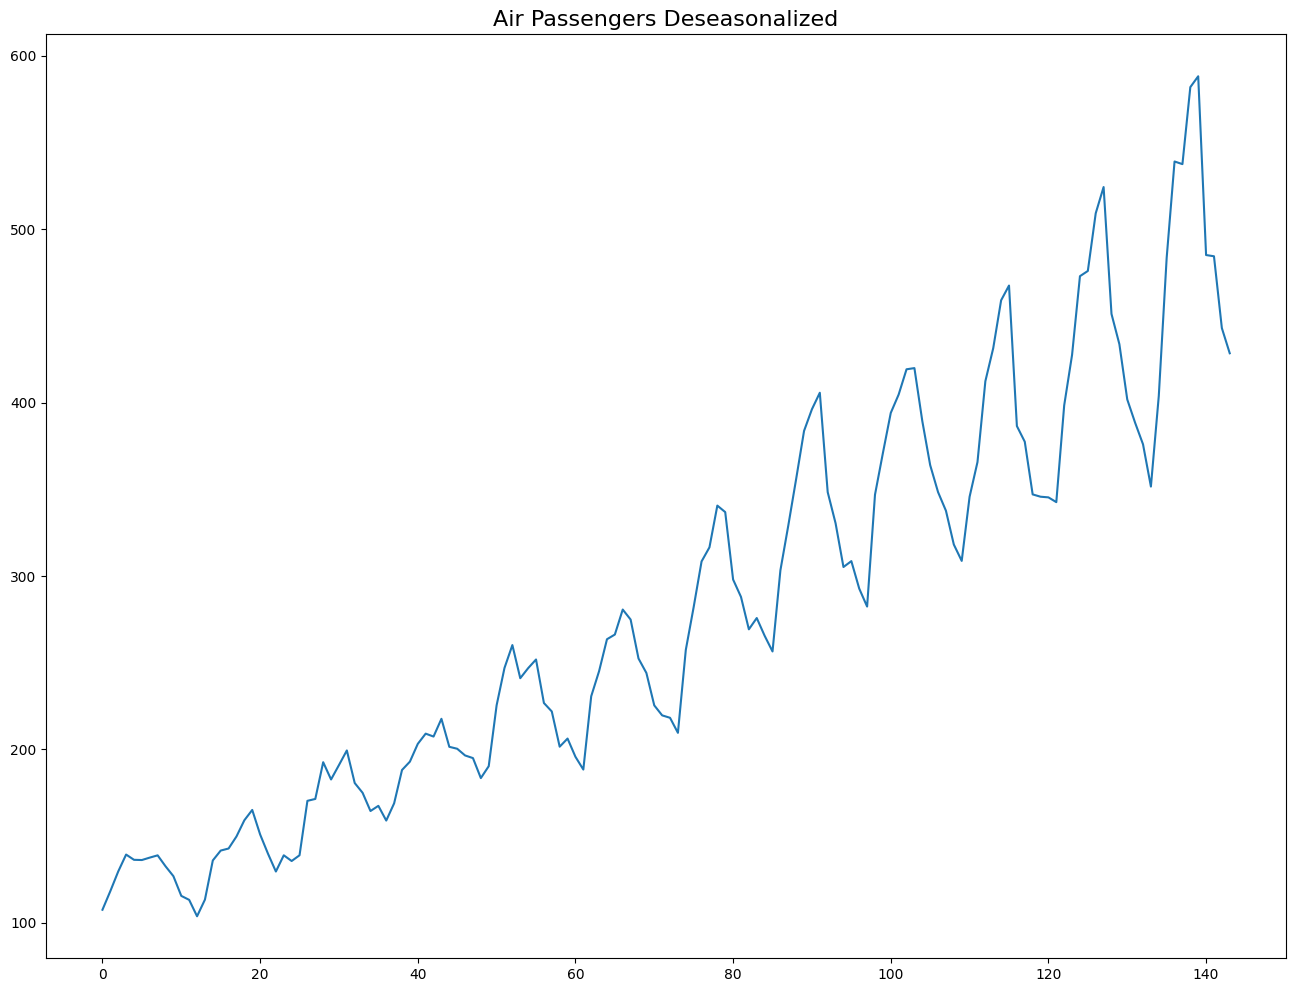

In [13]:
# Subtracting the Trend Component

# Time Series Decomposition
result_mul = seasonal_decompose(df['#Passengers'], model='multiplicative', period=30)

# Deseasonalize
deseasonalized = df['#Passengers'].values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

##### Test for Seasonality of a Time Series
The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.
* Hour of day
* Day of month
* Weekly
* Monthly
* Yearly  
However, if we want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. If there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

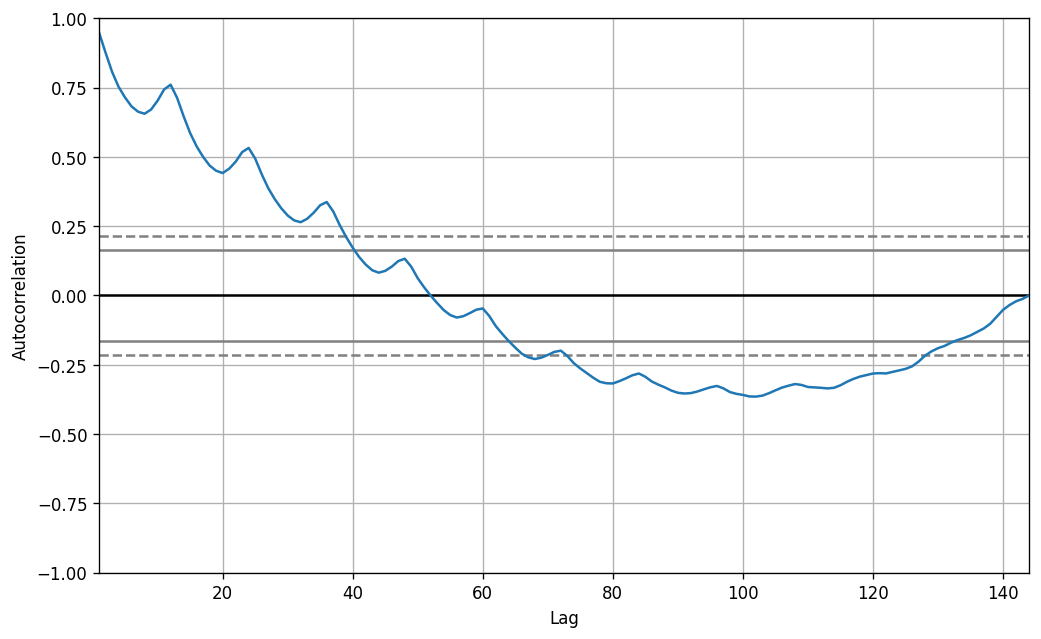

In [14]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['#Passengers'].tolist())

##### Autocorrelation and Partial Autocorrelation Functions 
* Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
* Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

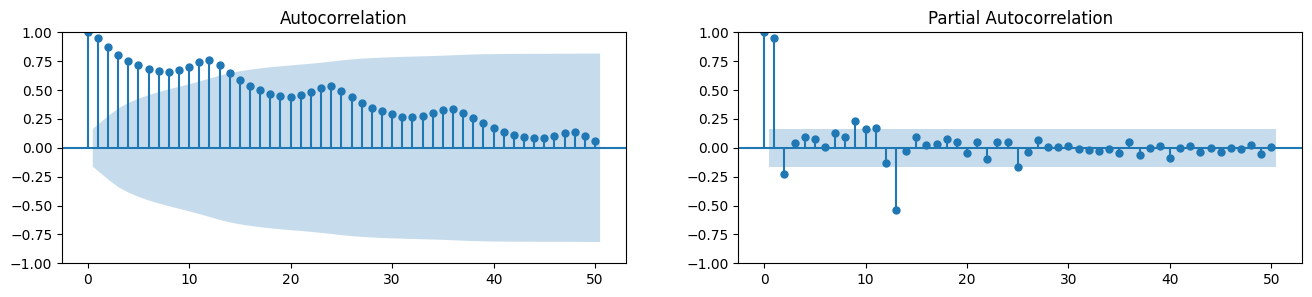

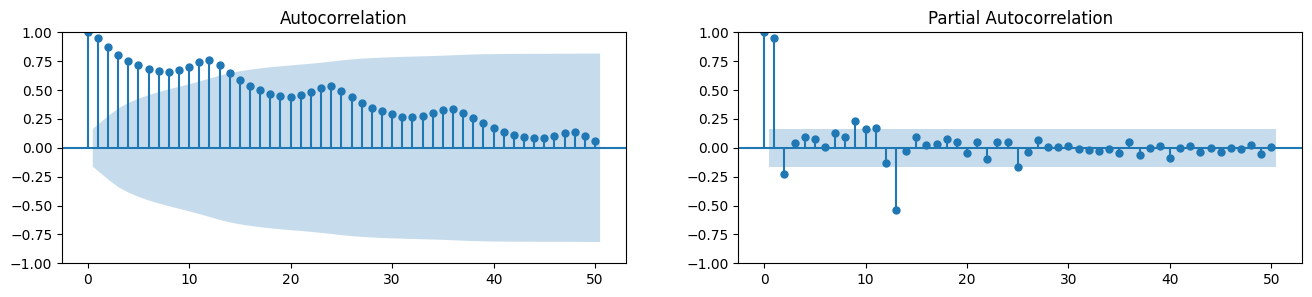

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['#Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['#Passengers'].tolist(), lags=50, ax=axes[1])

##### Computation of Partial Autocorrelation Function
* The partial autocorrelation function of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is the linear regression of Y with its own lags as predictors.
* For example, if Y(t) is the current series and Y(t-1) is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y(t-3)) is the coefficient a3 of Y(t-3) in the following equation: 

Y(t) = a0 + a1 * Y(t-1) + a2 * Y(t-2) + a3 * Y(t-3)

##### Lag Plots
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

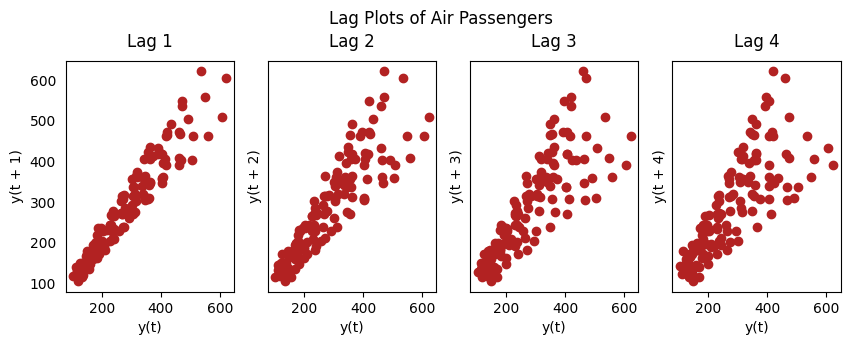

In [16]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['#Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

##### Smoothening a Time Series
Smoothening of a time series may be useful in the following circumstances:
* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
* The smoothed version of series can be used as a feature to explain the original series itself.
* Visualize the underlying trend better. 
* We can smoothen a time series using the following methods:
    * Take a moving average
    * Do a LOESS smoothing (Localized Regression)
    * Do a LOWESS smoothing (Locally Weighted Regression)

###### Moving Average
Moving average is the average of a rolling window of defined width. We must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

###### Localized Regression
LOESS, short for ‘Localized Regression’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.